In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
mpl.rcParams['figure.dpi'] = 300

### Read function

In [2]:
def read_length(data) :
    
    rl = []
    f = open(data, "r")
    for line in f :
        if line.startswith("RL") :
            s = line.strip().split("\t")
            length = int(s[1])
            freq = int(s[2])

            for i in range(freq) :
                rl.append(length)
    f.close()
    
    return rl

### Real data

```bash
wd=/media/urbe/MyCDrive1/Antoine/2023-02-13_ARC_ONT_simulation_deletion/
real=${wd}/real_v_del.mm2_splice.sorted.bam

simsep=${wd}/sim_sep_v_del_round2.mm2_splice.sorted.bam

simmer=${wd}/sim_merged_v_del_round2.mm2_splice.sorted.bam

samtools stats $real > $wd/real.stats.txt
samtools stats $simsep > $wd/sep.stats.txt
samtools stats $simmer > $wd/mer.stats.txt
```

In [3]:
data = "/media/urbe/MyCDrive1/Antoine/2023-02-13_ARC_ONT_simulation_deletion/real.stats.txt"
rl_real = read_length(data)

In [4]:
print("min:", np.min(rl_real))
print("max:", np.max(rl_real))
print("mean:", np.mean(rl_real))
print("median:", np.median(rl_real))
print("std:", np.std(rl_real))
print("log10(std)", np.log10(np.std(rl_real)))
print("log(std)", np.log(np.std(rl_real)))

min: 15000
max: 218410
mean: 32273.5951215021
median: 28414.0
std: 14988.721969027936
log10(std) 4.175764603798156
log(std) 9.615053328557822


### Sim data separated

In [5]:
data = "/media/urbe/MyCDrive1/Antoine/2023-02-13_ARC_ONT_simulation_deletion/sep.stats.txt"
rl_sim_sep = read_length(data)

In [6]:
print(np.mean(rl_sim_sep))

49059.9815757329


### Sim data merged

In [7]:
data = "/media/urbe/MyCDrive1/Antoine/2023-02-13_ARC_ONT_simulation_deletion/mer.stats.txt"
rl_sim_merged = read_length(data)

In [8]:
print(np.mean(rl_sim_merged))

48921.920549883755


### Plot

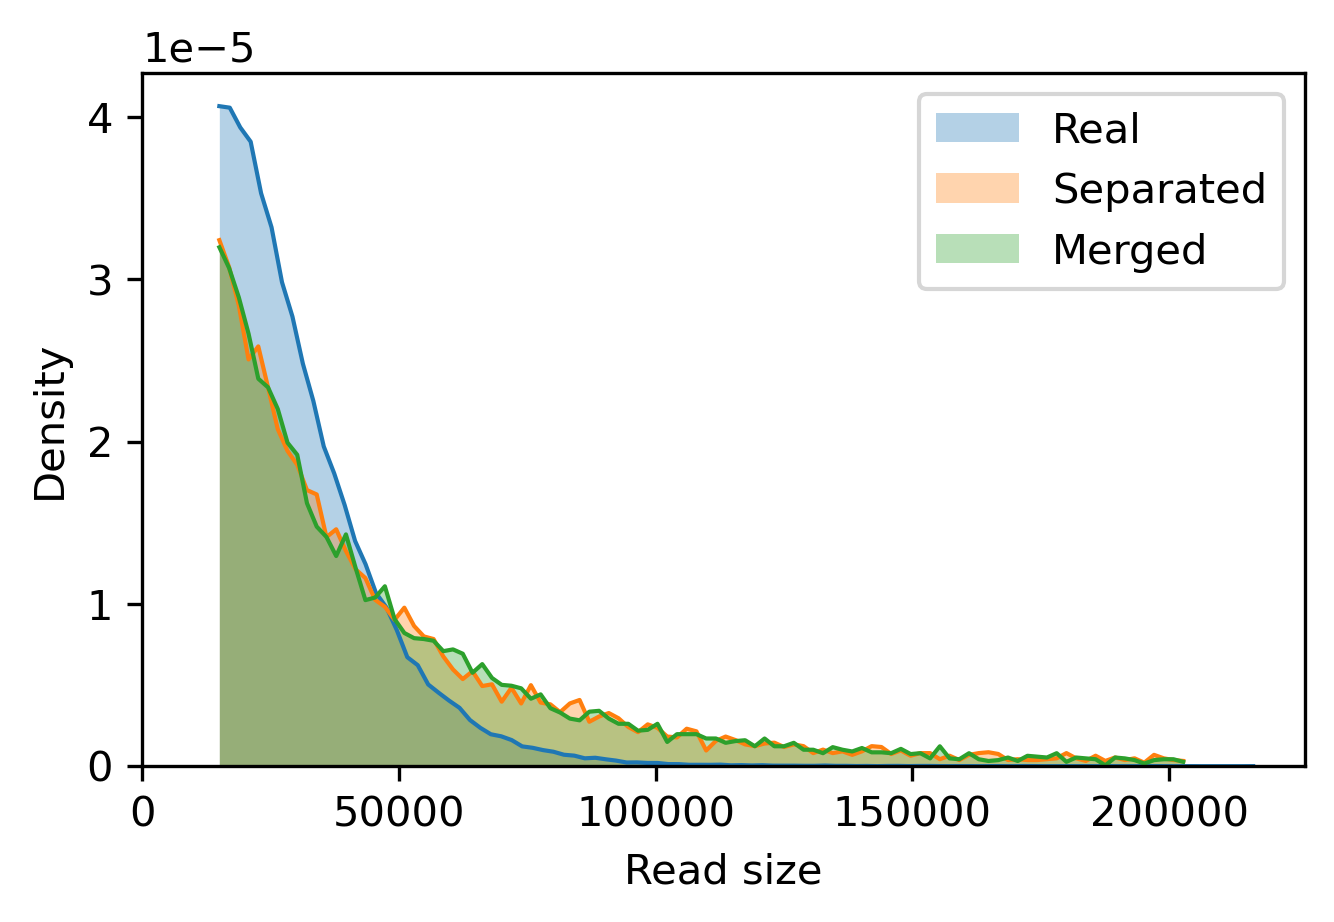

In [20]:
labels = ["Real", "Separated", "Merged"]
rl_data = [rl_real, rl_sim_sep, rl_sim_merged]

i = 0
fig, ax = plt.subplots(figsize=(5,3))
for label, data in zip(labels, rl_data) :

    freq, bins = np.histogram(data, density=True, bins=100)
    ax.plot(bins[:-1], freq, lw=1.0, color=colors[i])
    ax.fill_between(bins[:-1], freq, 0, lw=0.0, facecolor=colors[i]+"55", edgecolor=colors[i], label=label)
    i += 1

ax.legend()
ax.set_xlabel("Read size")
ax.set_ylabel("Density")
ax.set_ylim(0.0, )
ax.set_xlim(0.0, )

plt.show()

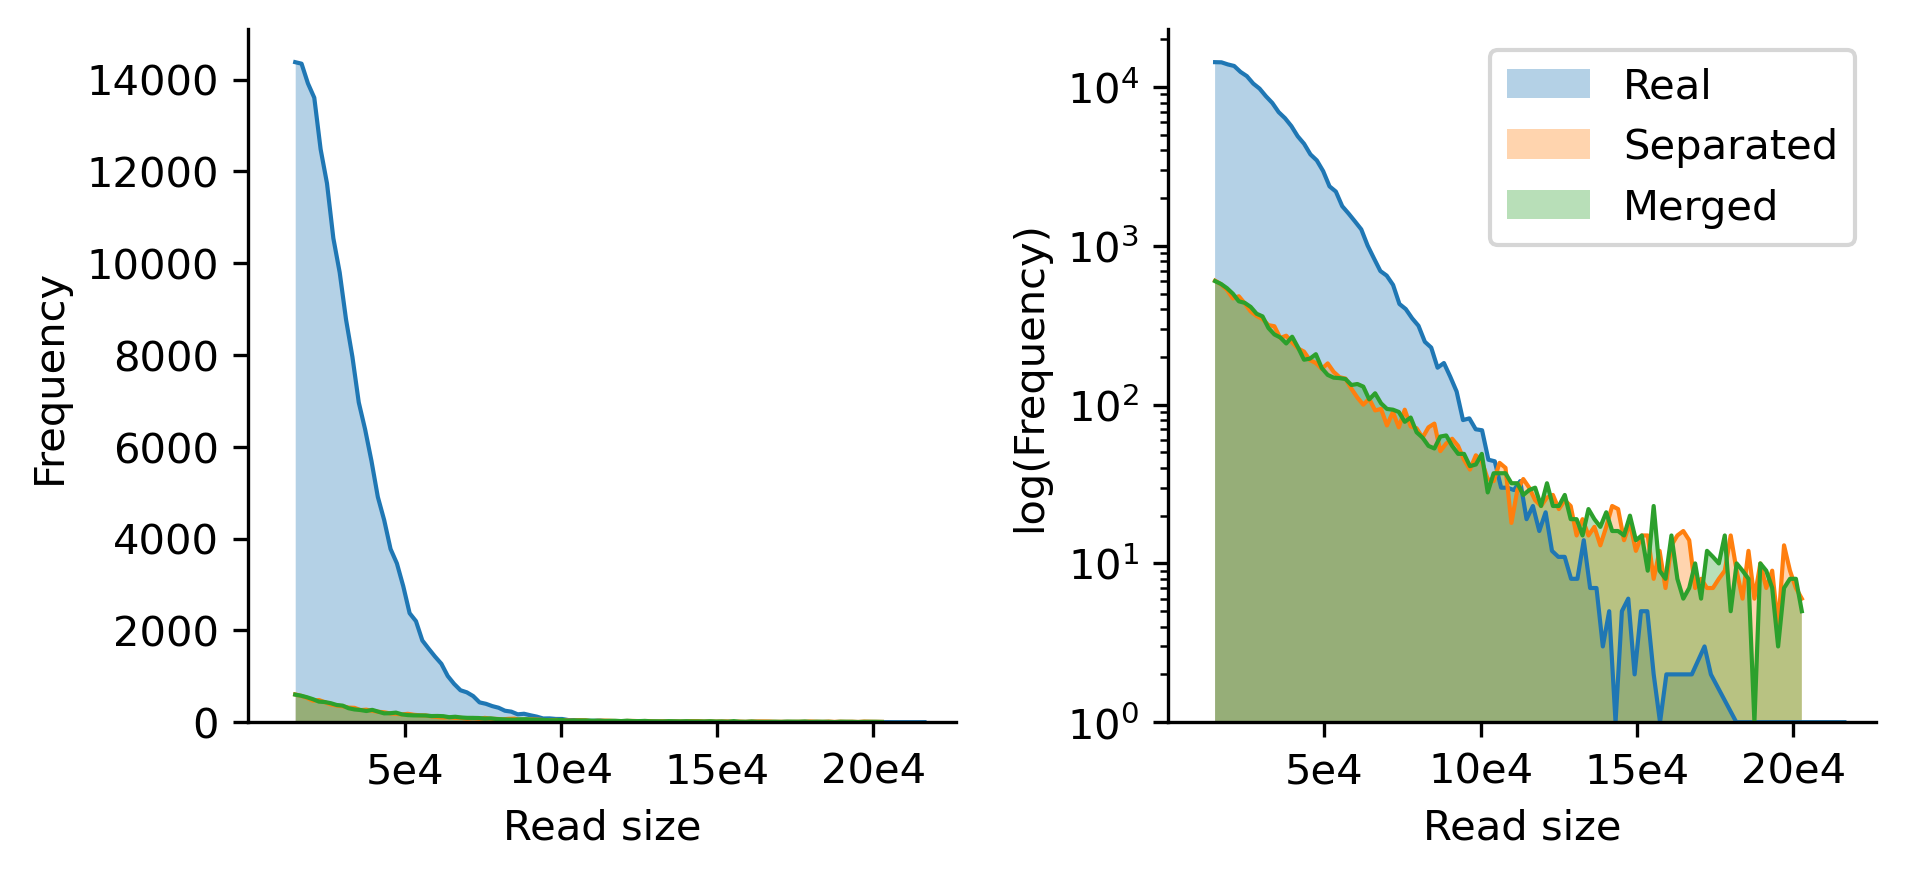

In [66]:
labels = ["Real", "Separated", "Merged"]
rl_data = [rl_real, rl_sim_sep, rl_sim_merged]

i = 0
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

for label, data in zip(labels, rl_data) :

    freq, bins = np.histogram(data, density=False, bins=100)
    ax[0].plot(bins[:-1], freq, lw=1.0, color=colors[i])
    ax[0].fill_between(bins[:-1], freq, 0, lw=0.0, facecolor=colors[i]+"55", edgecolor=colors[i], label=label)
    
    b2 = [b for i, b in enumerate(bins[:-1]) if freq[i] > 0]
    f2 = [f for f in freq if f > 0]
    ax[1].plot(b2, f2, lw=1.0, color=colors[i])
    ax[1].fill_between(b2, f2, 0, lw=0.0, facecolor=colors[i]+"55", edgecolor=colors[i], label=label)
    
    i += 1
    
ax[0].set_ylabel("Frequency")
ax[0].set_ylim(0.0, )
    
ax[1].set_yscale("log")
ax[1].set_ylim(1.0, )
ax[1].set_ylabel("log(Frequency)")
#ax[1].axhline(30, lw=0.5, color="k")
#ax[1].axhline(10, lw=0.5, color="k")

for axi in ax :
    axi.set_xlabel("Read size")
    axi.set_xlim(0.0, )
    xticks = axi.get_xticks()
    xticks = xticks[1:-1]
    newxticklabels = ["{}e4".format(int(tick/10000)) for tick in xticks]
    axi.set_xticks(xticks)
    axi.set_xticklabels(newxticklabels)
    axi.spines[["right", "top"]].set_visible(False)

plt.subplots_adjust(wspace=0.3)

plt.legend()

plt.show()

## Coverage of reads (sim vs obs) 

```bash
wd=/media/urbe/MyCDrive1/Antoine/2023-02-13_ARC_ONT_simulation_deletion/
real=${wd}/real_v_del.mm2.sorted.bam
simsep=${wd}/sim_sep_v_del_round2.mm2.sorted.bam
simmer=${wd}/sim_merged_v_del_round2.mm2.sorted.bam

samtools depth -a -H --threads 24 -o $wd/real.coverage.tsv $real

samtools depth -a -H --threads 24 -o $wd/sep.coverage.tsv $simsep

samtools depth -a -H --threads 24 -o $wd/mer.coverage.tsv $simmer
```

In [10]:
real_cov = pd.read_csv(
    "/media/urbe/MyCDrive1/Antoine/2023-02-13_ARC_ONT_simulation_deletion/real.coverage.tsv",
    header=0, usecols=range(3), names=["ref", "pos", "cov"], sep="\t"
)
real_cov = real_cov[["pos", "cov"]]

sep_cov = pd.read_csv(
    "/media/urbe/MyCDrive1/Antoine/2023-02-13_ARC_ONT_simulation_deletion/sep.coverage.tsv",
    header=0, usecols=range(3), names=["ref", "pos", "cov"], sep="\t"
)
sep_cov = sep_cov[["pos", "cov"]]

mer_cov = pd.read_csv(
    "/media/urbe/MyCDrive1/Antoine/2023-02-13_ARC_ONT_simulation_deletion/mer.coverage.tsv",
    header=0, usecols=range(3), names=["ref", "pos", "cov"], sep="\t"
)
mer_cov = mer_cov[["pos", "cov"]]

In [11]:
dfs = {}

for df, label in zip([real_cov, sep_cov, mer_cov], ["real", "sep", "mer"]) :
    print(df["cov"].median())
    print("")
    df = df.assign(normcov=df["cov"]/df["cov"].median())
    dfs[label] = df

974.0

519.0

547.0



### Coverage hists

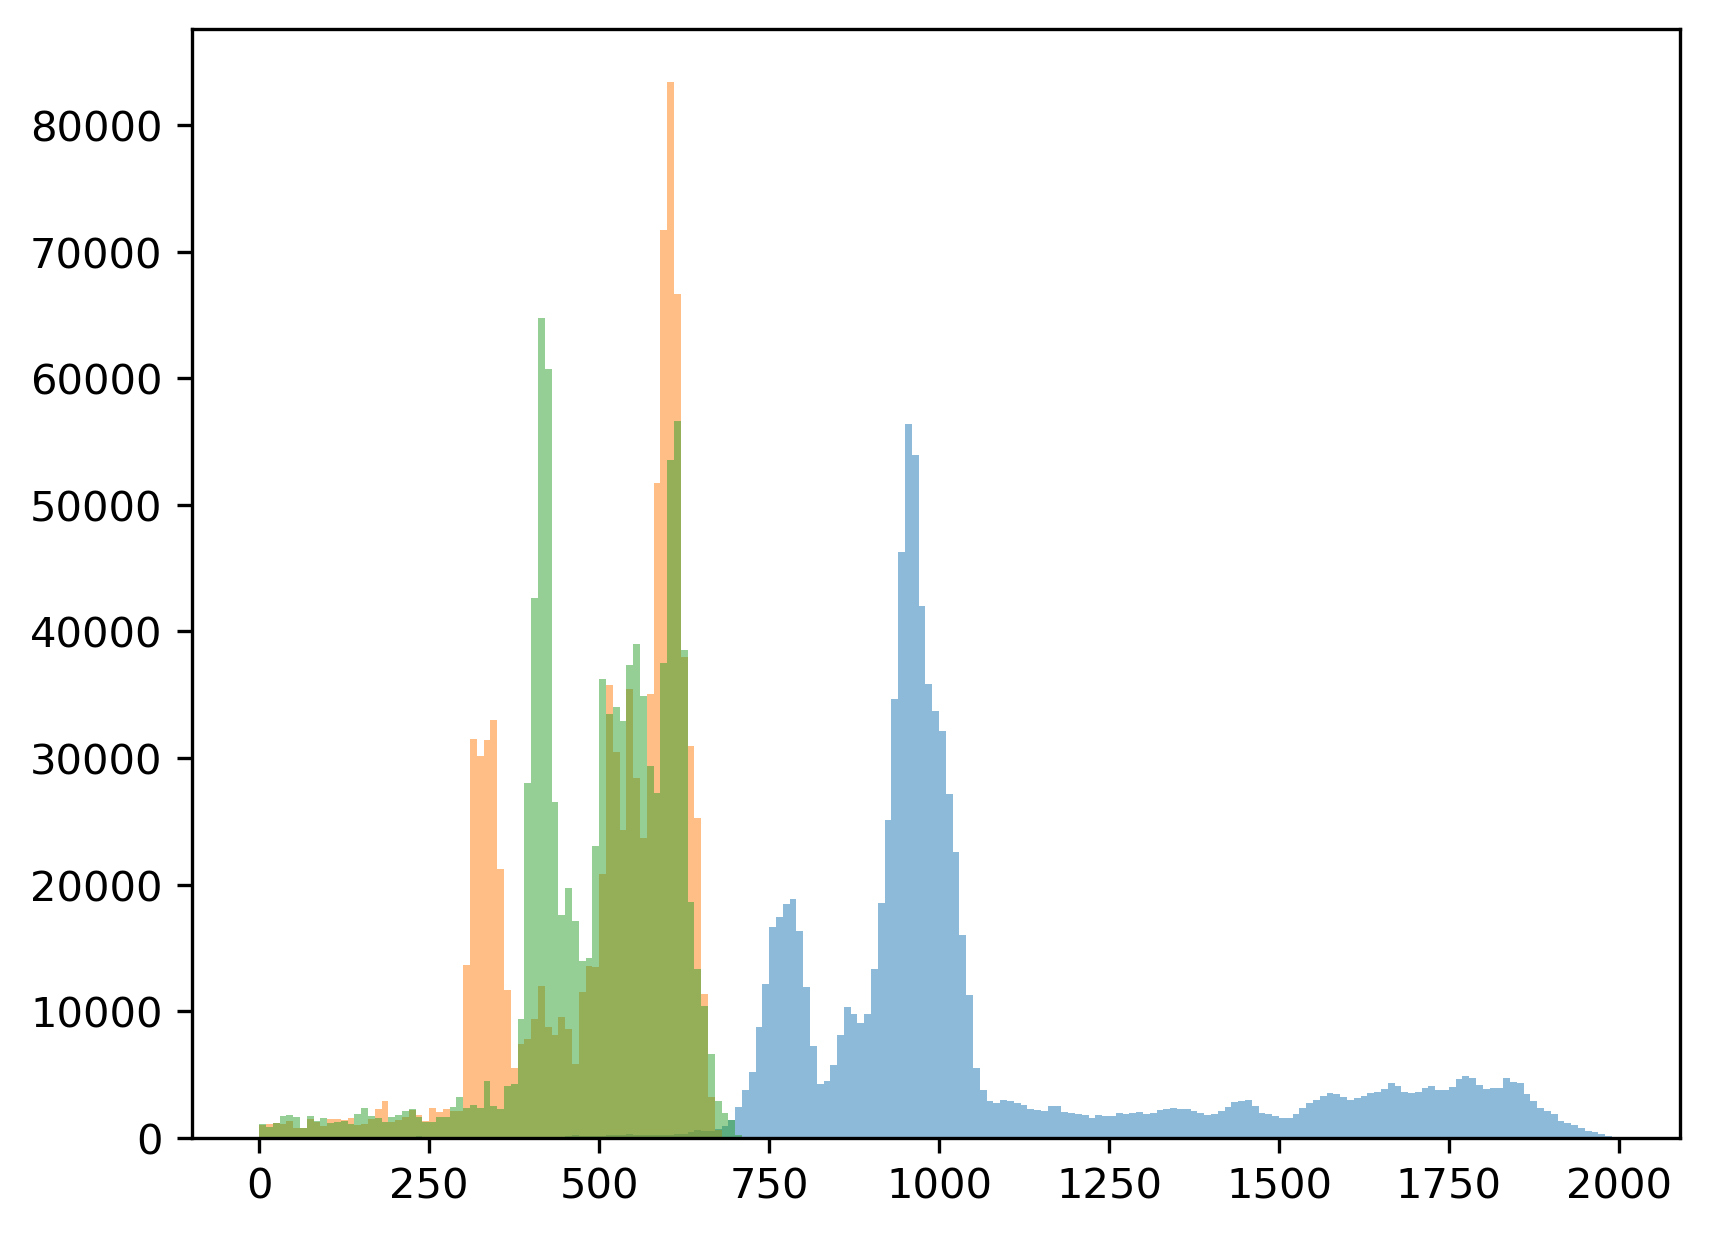

In [12]:
fig, ax = plt.subplots()

ax.hist(real_cov["cov"], bins=np.arange(0, 2000, 10), histtype="stepfilled", alpha=0.5)
ax.hist(mer_cov["cov"], bins=np.arange(0, 2000, 10), histtype="stepfilled", alpha=0.5)
ax.hist(sep_cov["cov"], bins=np.arange(0, 2000, 10), histtype="stepfilled", alpha=0.5)

plt.show()

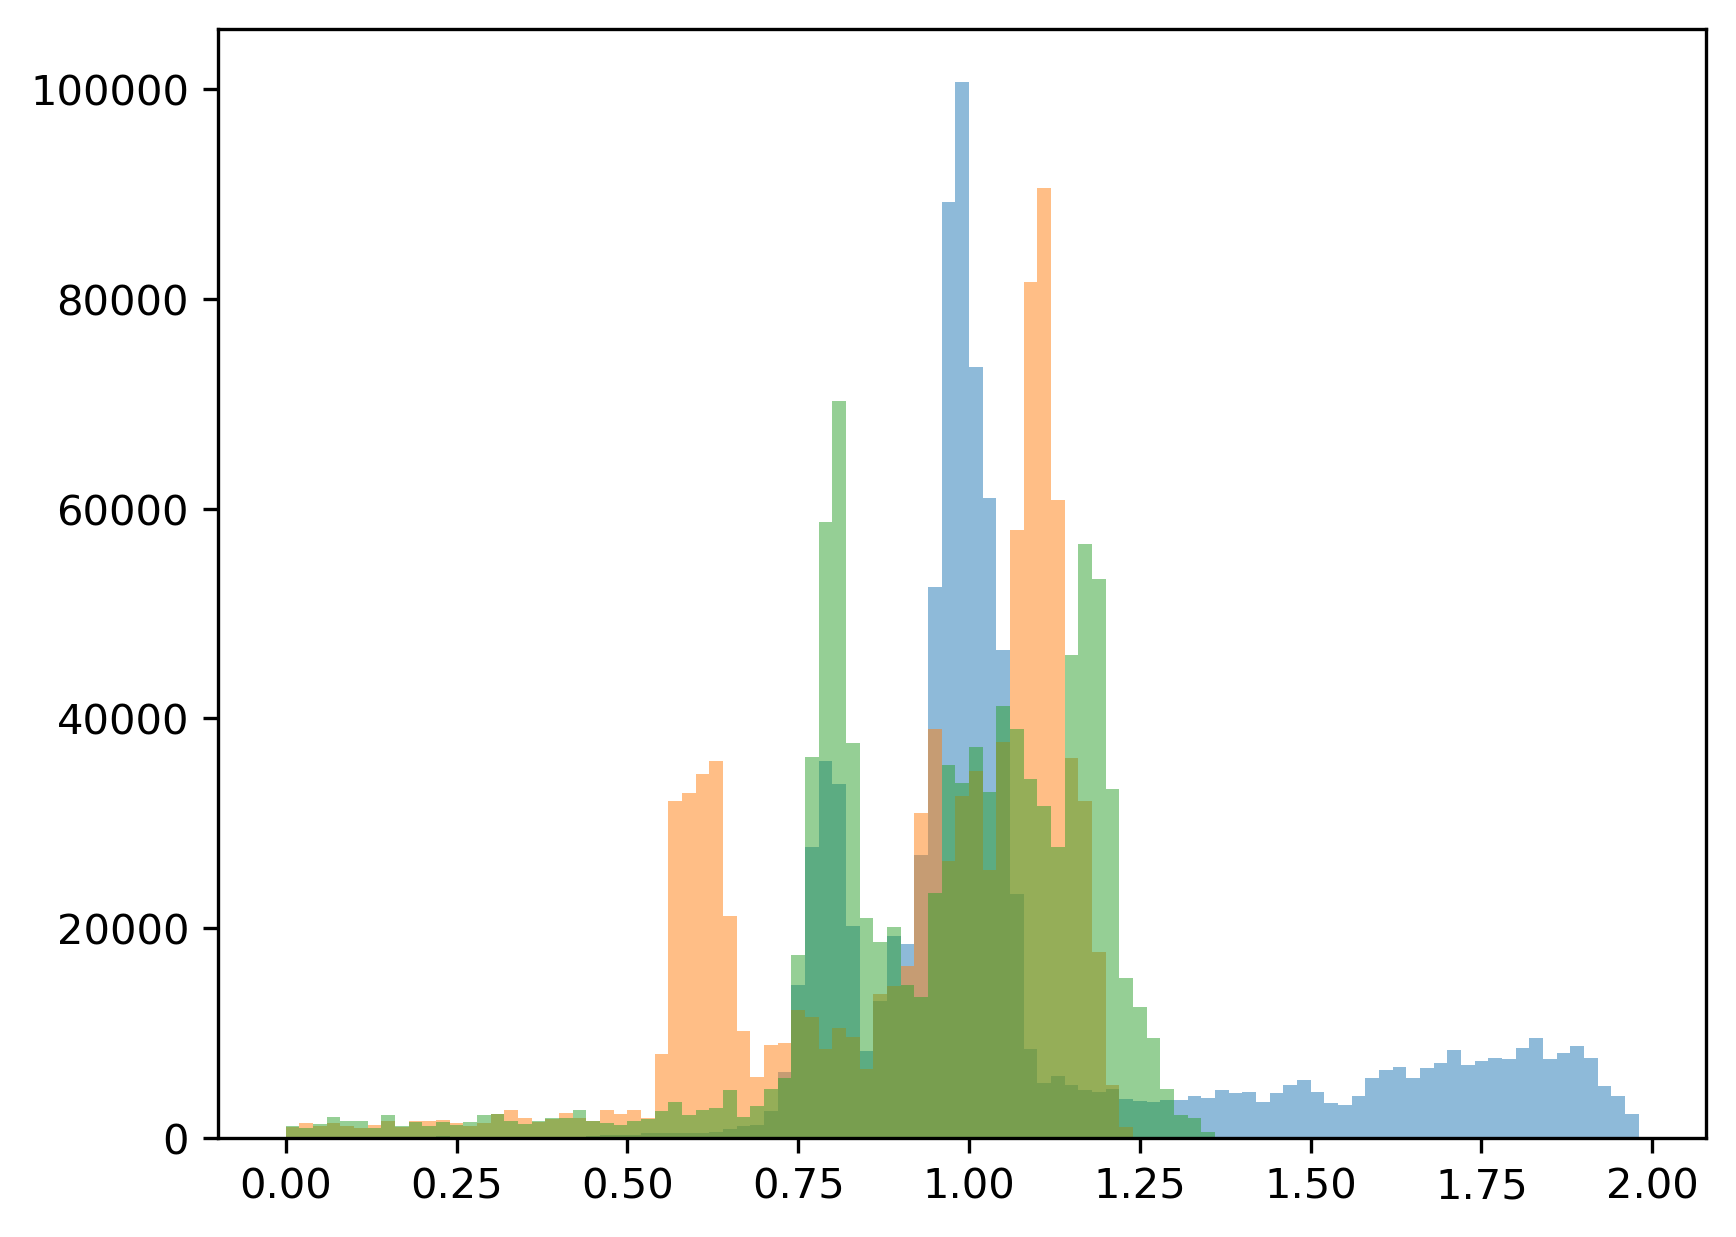

In [13]:
fig, ax = plt.subplots()

ax.hist(dfs["real"]["normcov"], bins=np.arange(0, 2.0, 0.02), histtype="stepfilled", alpha=0.5)
ax.hist(dfs["mer"]["normcov"], bins=np.arange(0, 2.0, 0.02), histtype="stepfilled", alpha=0.5)
ax.hist(dfs["sep"]["normcov"], bins=np.arange(0, 2.0, 0.02), histtype="stepfilled", alpha=0.5)

plt.show()

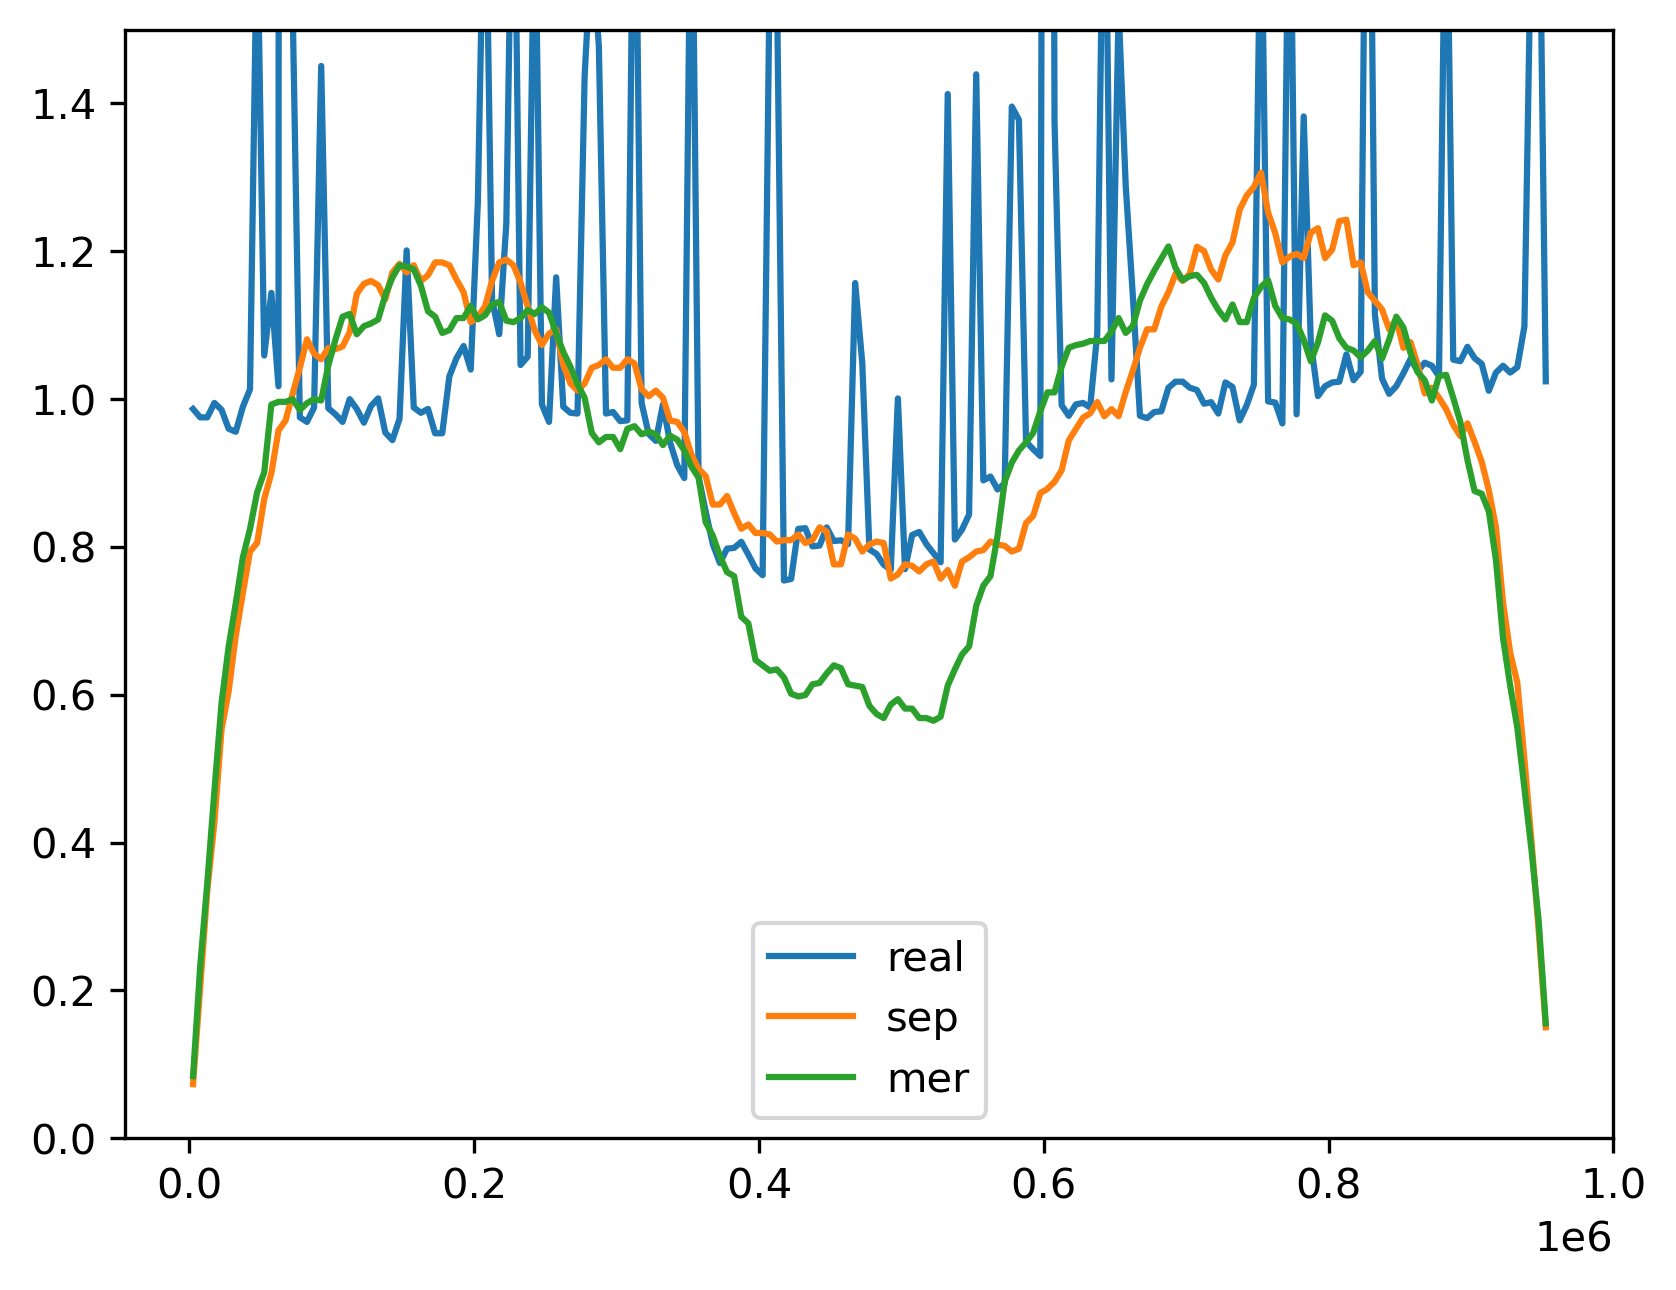

In [14]:
fig, ax = plt.subplots()


for lab, df in dfs.items() :

    bins = np.arange(0, max(df["pos"]), 5000)
    df = df.assign(BIN=pd.cut(df["pos"], bins))
    gb = df.groupby(by="BIN").agg({"pos":"median", "normcov":"median"})
    ax.plot(gb["pos"], gb["normcov"], label=lab)

ax.set_ylim(0,1.5)
ax.legend()
plt.show()